In [339]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# LOAD DATA AND EDA

In [340]:
n_cpu = os.cpu_count()
n_thread = n_cpu*2

In [341]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [342]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [344]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [345]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# DATA VISUALIZATION

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

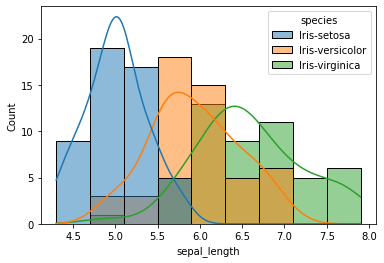

In [346]:
sns.histplot(data=df, x='sepal_length', hue='species', kde=True)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

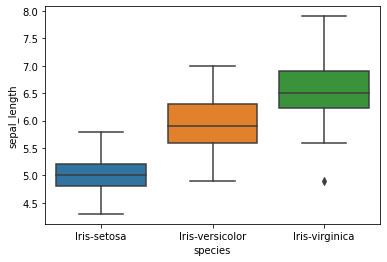

In [347]:
sns.boxplot(data=df, x='species', y='sepal_length')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

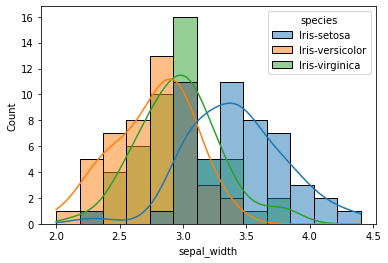

In [348]:
sns.histplot(data=df, x='sepal_width', hue='species', kde=True)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

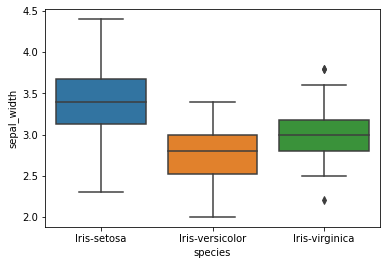

In [349]:
sns.boxplot(data=df, x='species', y='sepal_width')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

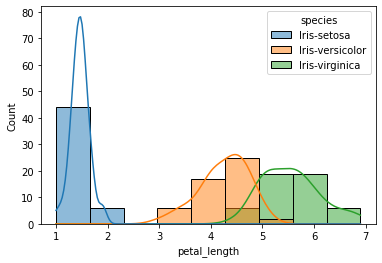

In [350]:
sns.histplot(data=df, x='petal_length', hue='species', kde=True)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

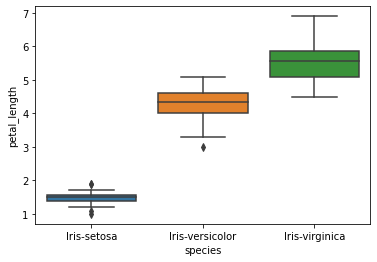

In [351]:
sns.boxplot(data=df, x='species', y='petal_length')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

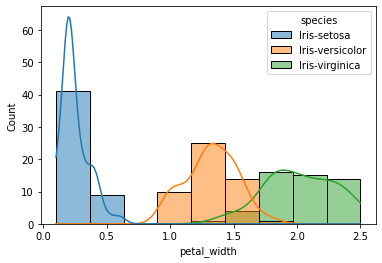

In [352]:
sns.histplot(data=df, x='petal_width', hue='species', kde=True)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

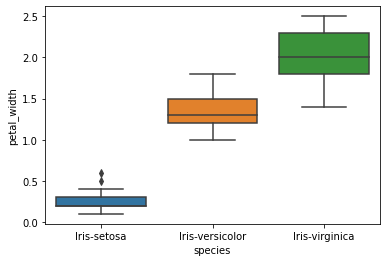

In [353]:
sns.boxplot(data=df, x='species', y='petal_width')

# DATA PREPROCESSING

In [354]:
from sklearn.preprocessing import LabelEncoder

In [355]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [356]:
X = df.drop(['species'], axis=1)
y = df['species']

In [357]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [358]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [359]:
from sklearn.preprocessing import StandardScaler

In [360]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
y_scaled = y

In [361]:
X_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [362]:
y_scaled.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# MODEL LEARNING

* **Normal data**

In [363]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [366]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_lgb = lgb.LGBMClassifier()

decision tree

In [367]:
param_dt = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15], 
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10,15],
    'max_features':[None,'sqrt','log2']
}

In [368]:
GSDT = GridSearchCV(model_dt, param_dt, cv=4, scoring='accuracy', n_jobs=n_thread)
GSDT.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [369]:
print('best_param:', GSDT.best_params_)
print('best_score:', GSDT.best_score_)

best_param: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 15}
best_score: 0.9642857142857144


In [370]:
pred_dt = GSDT.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



random forest

In [371]:
param_rf = {
    'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2,5],
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10],
    'max_features':['sqrt']
}

In [372]:
GSRF = GridSearchCV(model_rf, param_rf, cv=4, scoring='accuracy', n_jobs=n_thread)
GSRF.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [373]:
print('best_param:', GSRF.best_params_)
print('best_score:', GSRF.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best_score: 0.9464285714285715


In [374]:
pred_rf = GSRF.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



xgb

In [375]:
param_xgb = {
    'max_depth':[5,8],
    'min_child_weight':[1,5],
    'gamma':[0,1],
    'colsample_bytree':[0.8,1],
    'colsample_bylevel':[0.9,1],
    'n_estimators':[50,100]
}

In [376]:
GS_XGB = GridSearchCV(model_xgb, param_xgb, cv=4, scoring='accuracy', n_jobs=n_thread)
GS_XGB.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [377]:
print('best_param:', GS_XGB.best_params_)
print('best_score:', GS_XGB.best_score_)

best_param: {'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50}
best_score: 0.955357142857143


In [378]:
pred_xgb = GS_XGB.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



lgbm

In [379]:
param_lgb = {
    'num_leaves':[32,64,128],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[100,150]
}

In [380]:
GS_LGB = GridSearchCV(model_lgb, param_lgb, cv=4, scoring='accuracy', n_jobs=n_thread)
GS_LGB.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=8,
             param_grid={'colsample_bytree': [0.8, 1],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

In [381]:
print('best_param:', GS_LGB.best_params_)
print('best_score:', GS_LGB.best_score_)

best_param: {'colsample_bytree': 1, 'min_data_in_leaf': 1, 'n_estimators': 100, 'num_leaves': 32}
best_score: 0.9642857142857144


In [382]:
pred_lgb = GS_LGB.predict(X_test)
print(classification_report(y_test, pred_lgb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      0.94      0.94        16
           2       0.90      1.00      0.95         9

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



* **Standard data**

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=1)

decision tree

In [384]:
GSDT1 = GridSearchCV(model_dt, param_dt, cv=4, scoring='accuracy', n_jobs=n_thread)
GSDT1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [385]:
print('best_param:', GSDT1.best_params_)
print('best_score:', GSDT1.best_score_)

best_param: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 15}
best_score: 0.9522792022792024


In [386]:
pred_dt1 = GSDT1.predict(X_test)
print(classification_report(y_test, pred_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



random forest

In [387]:
GSRF1 = GridSearchCV(model_rf, param_rf, cv=4, scoring='accuracy', n_jobs=n_thread)
GSRF1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [388]:
print('best_param:', GSRF1.best_params_)
print('best_score:', GSRF1.best_score_)

best_param: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
best_score: 0.951923076923077


In [389]:
pred_rf1 = GSRF1.predict(X_test)
print(classification_report(y_test, pred_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



xgb

In [390]:
GS_XGB1 = GridSearchCV(model_xgb, param_xgb, cv=4, scoring='accuracy', n_jobs=n_thread)
GS_XGB1.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [391]:
print('best_param:', GS_XGB1.best_params_)
print('best_score:', GS_XGB1.best_score_)

best_param: {'colsample_bylevel': 0.9, 'colsample_bytree': 1, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50}
best_score: 0.951923076923077


In [392]:
pred_xgb1 = GS_XGB1.predict(X_test)
print(classification_report(y_test, pred_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



lgbm

In [398]:
GS_LGB1 = GridSearchCV(model_lgb, param_lgb, cv=4, scoring='accuracy', n_jobs=n_thread)
GS_LGB1.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=8,
             param_grid={'colsample_bytree': [0.8, 1],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

In [394]:
print('best_param:', GS_LGB1.best_params_)
print('best_score:', GS_LGB1.best_score_)

best_param: {'colsample_bytree': 1, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 32}
best_score: 0.9423076923076924


In [395]:
pred_lgb1 = GS_LGB1.predict(X_test)
print(classification_report(y_test, pred_lgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45




We found that there is little performance difference between normal data and standard data models.

# MODEL FEATURE IMPORTANCES

* **Normal data model feature importances**

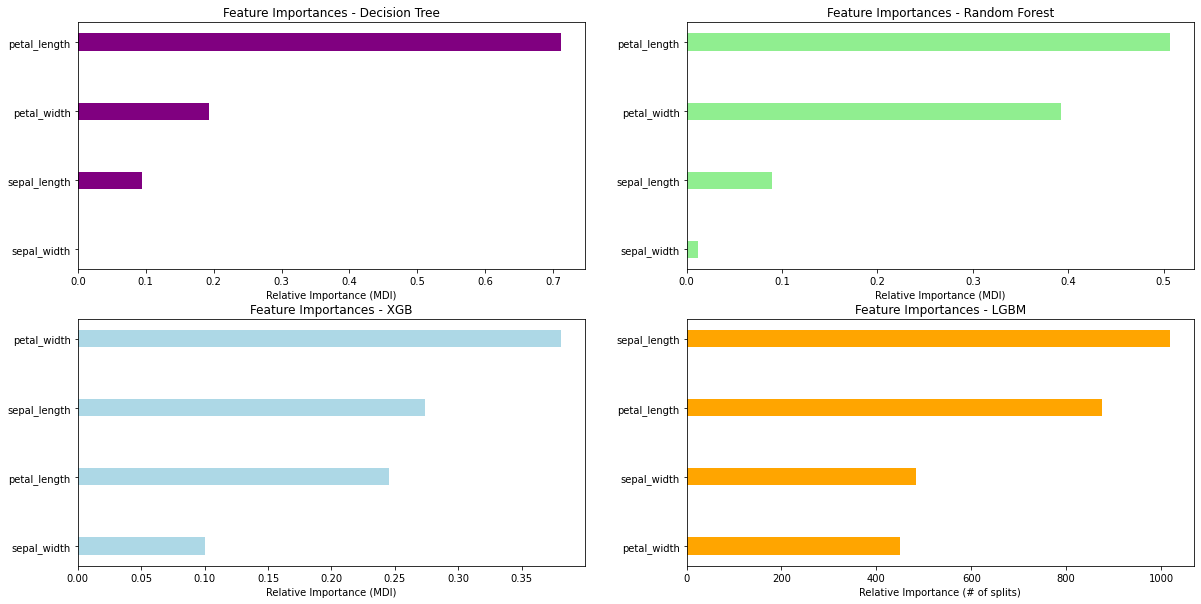

In [396]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
importances_dt = GSDT.best_estimator_.feature_importances_
indices_dt = np.argsort(importances_dt)

plt.title('Feature Importances - Decision Tree')
plt.barh(X.columns, importances_dt[indices_dt], .25, color='purple')
plt.yticks(X.columns, X.columns[indices_dt])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,2)
importances_rf = GSRF.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.title('Feature Importances - Random Forest')
plt.barh(X.columns, importances_rf[indices_rf], .25, color='lightgreen')
plt.yticks(X.columns, X.columns[indices_rf])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,3)
importances_xgb = GS_XGB.best_estimator_.feature_importances_
indices_xgb = np.argsort(importances_xgb)

plt.title('Feature Importances - XGB')
plt.barh(X.columns, importances_xgb[indices_xgb], .25, color='lightblue')
plt.yticks(X.columns, X.columns[indices_xgb])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,4)
importances_lgb = GS_LGB.best_estimator_.feature_importances_
indices_lgb = np.argsort(importances_lgb)

plt.title('Feature Importances - LGBM')
plt.barh(X.columns, importances_lgb[indices_lgb], .25, color='orange')
plt.yticks(X.columns, X.columns[indices_lgb])
plt.xlabel('Relative Importance (# of splits)')

plt.show()

* **Standard data model feature importances**

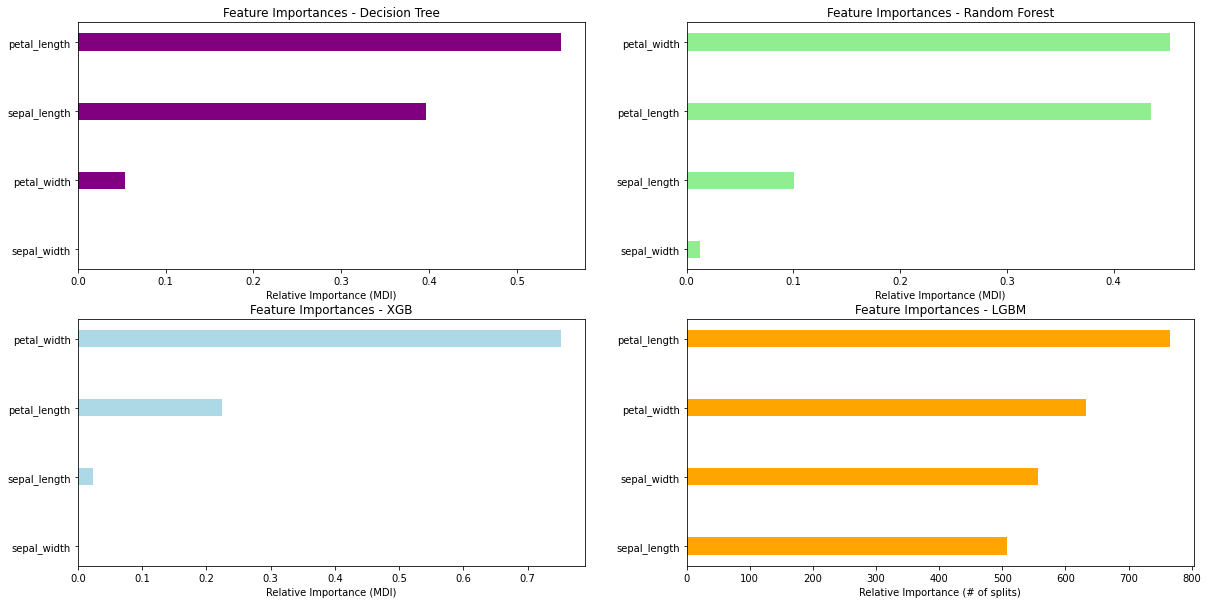

In [397]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
importances_dt1 = GSDT1.best_estimator_.feature_importances_
indices_dt1 = np.argsort(importances_dt1)

plt.title('Feature Importances - Decision Tree')
plt.barh(X.columns, importances_dt1[indices_dt1], .25, color='purple')
plt.yticks(X.columns, X.columns[indices_dt1])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,2)
importances_rf1 = GSRF1.best_estimator_.feature_importances_
indices_rf1 = np.argsort(importances_rf1)

plt.title('Feature Importances - Random Forest')
plt.barh(X.columns, importances_rf1[indices_rf1], .25, color='lightgreen')
plt.yticks(X.columns, X.columns[indices_rf1])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,3)
importances_xgb1 = GS_XGB1.best_estimator_.feature_importances_
indices_xgb1 = np.argsort(importances_xgb1)

plt.title('Feature Importances - XGB')
plt.barh(X.columns, importances_xgb1[indices_xgb1], .25, color='lightblue')
plt.yticks(X.columns, X.columns[indices_xgb1])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2,2,4)
importances_lgb1 = GS_LGB1.best_estimator_.feature_importances_
indices_lgb1 = np.argsort(importances_lgb1)

plt.title('Feature Importances - LGBM')
plt.barh(X.columns, importances_lgb1[indices_lgb1], .25, color='orange')
plt.yticks(X.columns, X.columns[indices_lgb1])
plt.xlabel('Relative Importance (# of splits)')

plt.show()